<h1> Galaxy Zoo Image Classification </h1> 

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Resizing

In [2]:
train = pd.read_csv('training_solutions_rev1/training_solutions_rev1.csv')

In [3]:
def append_ext(fn):
    return fn+".JPG"

train = pd.read_csv('training_solutions_rev1/training_solutions_rev1.csv')
train['ID'] = train['GalaxyID'].astype(str).apply(append_ext)


In [4]:
train.shape

(61578, 39)

In [5]:
train.drop(columns = 'ID').describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,...,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000
mean,550179.708337,0.432526,0.542261,0.025213,0.106408,0.435854,0.102526,0.333328,0.215629,0.220224,...,0.032780,0.091801,0.083969,0.039859,0.015411,0.094338,0.017587,0.007603,0.007006,0.073683
std,258724.130197,0.283517,0.296429,0.037967,0.212505,0.301867,0.177301,0.247675,0.285502,0.179835,...,0.098200,0.145125,0.139840,0.099657,0.052285,0.193920,0.067476,0.037678,0.037280,0.107454
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327874.250000,0.175812,0.280862,0.000000,0.000000,0.168490,0.000000,0.122592,0.000000,0.072656,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551933.000000,0.416994,0.558754,0.014870,0.000000,0.394850,0.000000,0.289248,0.092987,0.183640,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,773232.000000,0.679182,0.811339,0.034325,0.085161,0.694615,0.134555,0.516800,0.330231,0.338920,...,0.000000,0.147239,0.127381,0.030621,0.000000,0.098670,0.000000,0.000000,0.000000,0.128798
max,999967.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,1.000000,0.957937,...,0.901991,0.949733,0.877393,0.996952,0.886363,1.000000,0.975913,0.957000,0.938881,0.753082


<h3> EDA </h3>

In [6]:
train.shape

(61578, 39)

In [7]:
train.drop(columns = 'ID').describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,...,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000
mean,550179.708337,0.432526,0.542261,0.025213,0.106408,0.435854,0.102526,0.333328,0.215629,0.220224,...,0.032780,0.091801,0.083969,0.039859,0.015411,0.094338,0.017587,0.007603,0.007006,0.073683
std,258724.130197,0.283517,0.296429,0.037967,0.212505,0.301867,0.177301,0.247675,0.285502,0.179835,...,0.098200,0.145125,0.139840,0.099657,0.052285,0.193920,0.067476,0.037678,0.037280,0.107454
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327874.250000,0.175812,0.280862,0.000000,0.000000,0.168490,0.000000,0.122592,0.000000,0.072656,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551933.000000,0.416994,0.558754,0.014870,0.000000,0.394850,0.000000,0.289248,0.092987,0.183640,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,773232.000000,0.679182,0.811339,0.034325,0.085161,0.694615,0.134555,0.516800,0.330231,0.338920,...,0.000000,0.147239,0.127381,0.030621,0.000000,0.098670,0.000000,0.000000,0.000000,0.128798
max,999967.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,1.000000,0.957937,...,0.901991,0.949733,0.877393,0.996952,0.886363,1.000000,0.975913,0.957000,0.938881,0.753082


In [8]:
train.dtypes.value_counts()

float64    37
int64       1
object      1
dtype: int64

In [9]:
sample = train.sample(10).ID.values

In [10]:
def plt_images(df,directory):
    fig,ax = plt.subplots(2,5,figsize = (18,10))
    fig.suptitle('Training Data', fontsize=16)
    for i in range(len(sample)):
        row = i // 5
        col = i % 5
        image = plt.imread(directory + sample[i])
        ax[row,col].imshow(image)
        ax[row,col].set_title(f"Image: {sample[i]}\n Shape: {image.shape}")

def plt_images_resize(df,directory):
    out_height, out_width = 112,112 
    resize = Resizing(out_height, out_width)
    fig,ax = plt.subplots(2,5,figsize = (18,10))
    fig.suptitle('Training Data', fontsize=16)
    for i in range(len(sample)):
        row = i // 5
        col = i % 5
        image = plt.imread(directory + sample[i])
        resized =resize(image).numpy().astype("uint8")
        ax[row,col].imshow(resized)
        ax[row,col].set_title(f"Image: {sample[i]}\n Shape: {resized.shape}")

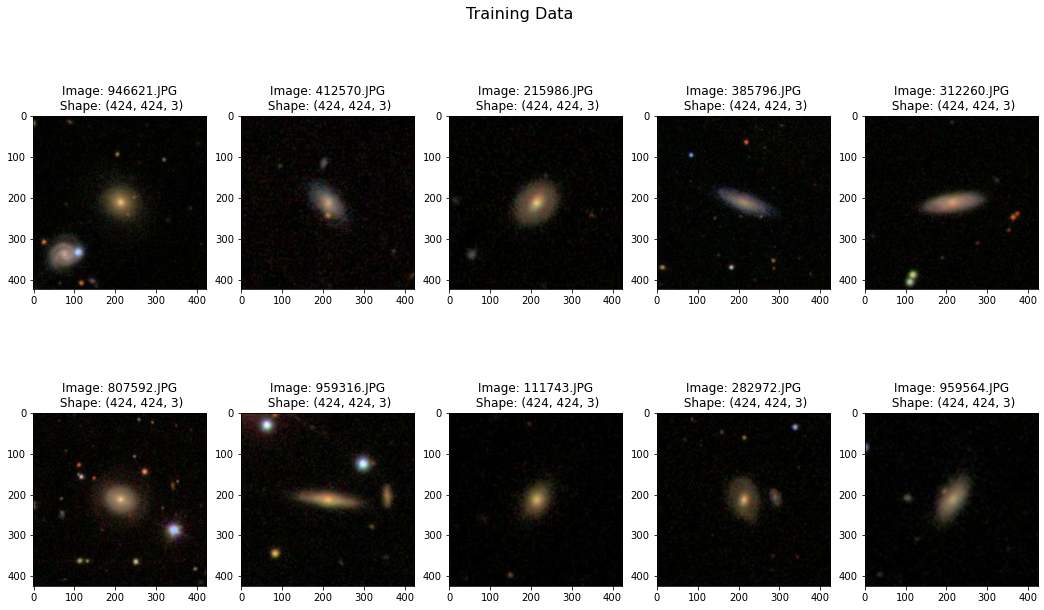

In [11]:
plt_images(train,"images_training_rev1\\images_training_rev1\\")

<p> Let's identify a reasonable resizing </p>

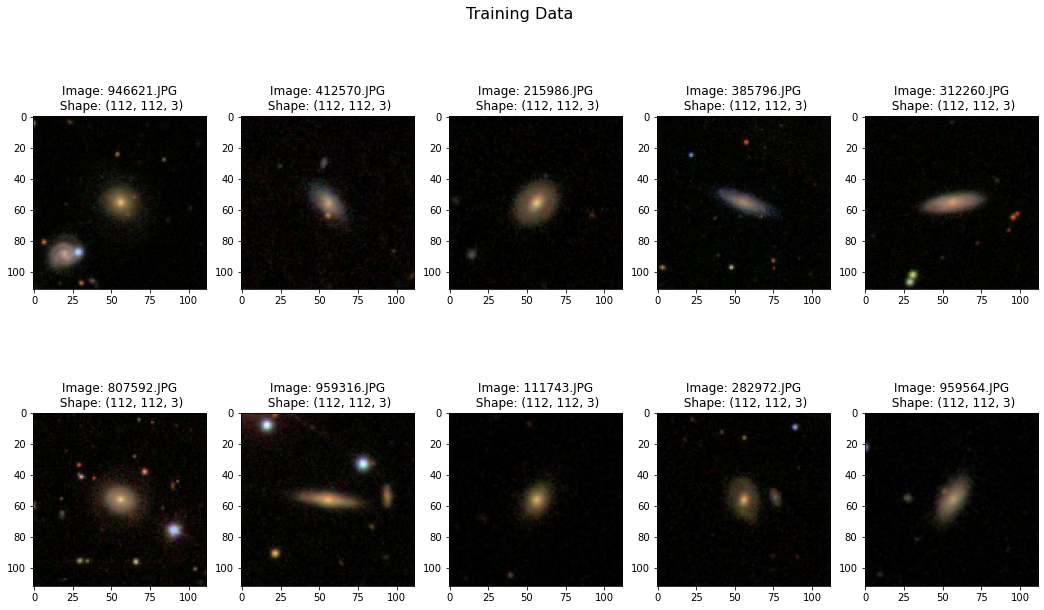

In [12]:
plt_images_resize(train,"images_training_rev1\\images_training_rev1\\")

<h5> Prepping For Training </h5>

In [13]:
datagen = ImageDataGenerator(
            rescale = 1./255, # rescale in the 0,1 range
            fill_mode = 'nearest',
            rotation_range=360,  # galaxies can come at various oreintations 
            width_shift_range=0.1, # should be centered but allow for shift in both directions
            height_shift_range=0.1, 
            zoom_range=0.1, # again should be centered so try small zoom range
            horizontal_flip=True, # galaxies can have various rotations
            vertical_flip = True,
            brightness_range=[0.25,1.25], # brightness profile of galaxy can change often
            shear_range = 0.1, # allowing for stretching of galaxies
            validation_split = 0.05)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.05)

In [14]:
labels = train.drop(columns = ['GalaxyID','ID']).columns.values

train_generator=datagen.flow_from_dataframe(
            dataframe=train,
            directory="images_training_rev1\\images_training_rev1\\",
            color_mode = 'rgb',
            x_col="ID",
            y_col=labels,
            subset="training",
            batch_size=128,
            seed=42,
            shuffle=True,
            class_mode="other",
            target_size=(112,112))

valid_generator=val_datagen.flow_from_dataframe(
            dataframe=train,
            directory="images_training_rev1\\images_training_rev1\\",
            color_mode = 'rgb',
            x_col="ID",
            y_col=labels,
            subset="validation",
            batch_size=128,
            seed=42,
            shuffle=False,
            class_mode="other",
            target_size=(112,112))

Found 58500 validated image filenames.
Found 3078 validated image filenames.


<h3> Building a basic CNN arch - first pass </h3>

In [21]:
base_CNN = keras.Sequential()

In [22]:
base_CNN.add(Conv2D(64,kernel_size = 3, strides = 2,padding = 'same',activation = 'relu',input_shape = (112,112,3)))
base_CNN.add(MaxPooling2D(pool_size = 2,strides = 2, padding = 'valid'))
base_CNN.add(Conv2D(116,kernel_size = 3,strides = 2, padding = 'same', activation = 'relu'))
base_CNN.add(MaxPooling2D(pool_size = 2,strides = 2, padding = 'valid'))
base_CNN.add(Flatten())
base_CNN.add(Dense(128, activation='relu'))
base_CNN.add(Dropout(0.2))
base_CNN.add(Dense(37, activation='sigmoid'))


In [15]:
from keras import backend as K
from keras.utils import get_custom_objects

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


rmse_metric = keras.metrics.RootMeanSquaredError(
    name="root_mean_squared_error", dtype=None)



In [16]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',mode = 'min',patience=10)

In [27]:
base_CNN.compile(optimizer='adam', loss=rmse, metrics=rmse_metric)

In [28]:
base_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 116)       66932     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 116)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5684)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [29]:
base_CNN.fit_generator(generator=train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator),
                    epochs=250, callbacks=[es]
)

C:\Users\hocke\AppData\Local\Temp/ipykernel_1464/377287449.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  base_CNN.fit_generator(generator=train_generator,


Epoch 1/250
458/458 [==============================] - 668s 1s/step - loss: 0.1677 - root_mean_squared_error: 0.1706 - val_loss: 0.1489 - val_root_mean_squared_error: 0.1490
Epoch 2/250
458/458 [==============================] - 379s 828ms/step - loss: 0.1460 - root_mean_squared_error: 0.1461 - val_loss: 0.1390 - val_root_mean_squared_error: 0.1391
Epoch 3/250
458/458 [==============================] - 278s 606ms/step - loss: 0.1397 - root_mean_squared_error: 0.1398 - val_loss: 0.1346 - val_root_mean_squared_error: 0.1347
Epoch 4/250
458/458 [==============================] - 280s 611ms/step - loss: 0.1362 - root_mean_squared_error: 0.1363 - val_loss: 0.1311 - val_root_mean_squared_error: 0.1312
Epoch 5/250
458/458 [==============================] - 278s 608ms/step - loss: 0.1328 - root_mean_squared_error: 0.1328 - val_loss: 0.1278 - val_root_mean_squared_error: 0.1278
Epoch 6/250
458/458 [==============================] - 278s 607ms/step - loss: 0.1301 - root_mean_squared_error: 0.130

In [30]:
base_CNN.save('FirstPassModel')


INFO:tensorflow:Assets written to: FirstPassModel\assets


INFO:tensorflow:Assets written to: FirstPassModel\assets


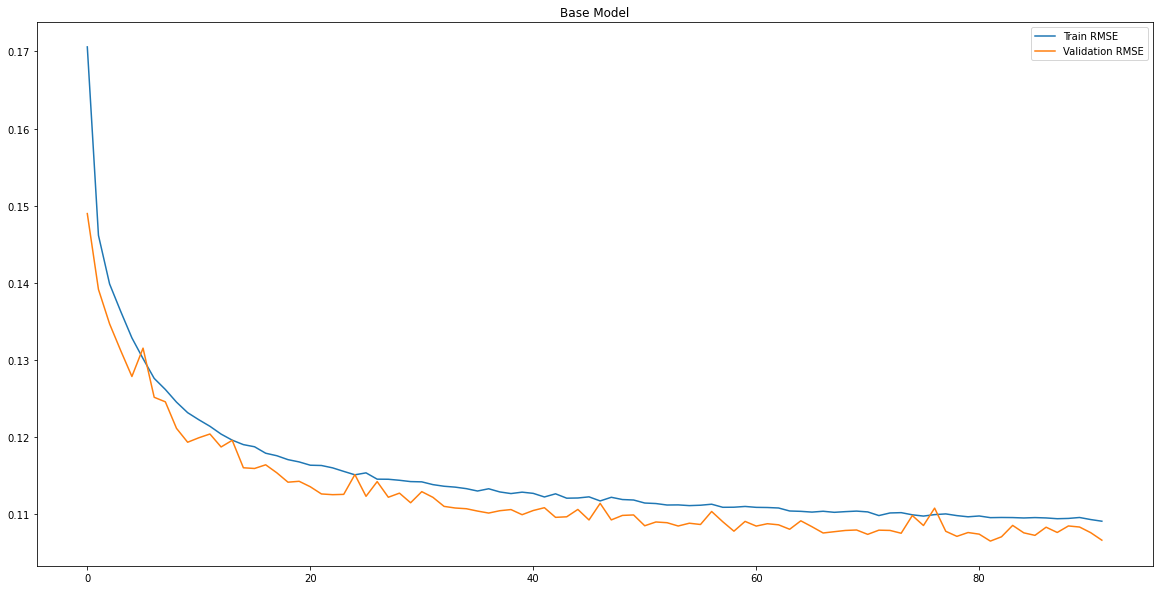

In [31]:
fig,ax = plt.subplots(1,1,figsize = (20,10))
ax.plot(base_CNN.history.history['root_mean_squared_error'],label = 'Train RMSE')
ax.plot(base_CNN.history.history['val_root_mean_squared_error'],label = 'Validation RMSE')
ax.set_title("Base Model")
plt.legend()

<h3> Hyperparameter Tuning </h3>

In [16]:
valid_generator.samples

3078

In [17]:
labels = train.drop(columns = ['GalaxyID','ID']).columns.values

train_generator=datagen.flow_from_dataframe(
            dataframe=train,
            directory="images_training_rev1\\images_training_rev1\\",
            color_mode = 'rgb',
            x_col="ID",
            y_col=labels,
            subset="training",
            batch_size=1200,
            seed=42,
            shuffle=True,
            class_mode="other",
            target_size=(112,112))

valid_generator=val_datagen.flow_from_dataframe(
            dataframe=train,
            directory="images_training_rev1\\images_training_rev1\\",
            color_mode = 'rgb',
            x_col="ID",
            y_col=labels,
            subset="validation",
            batch_size=50,
            seed=42,
            shuffle=False,
            class_mode="other",
            target_size=(112,112))

Found 58500 validated image filenames.
Found 3078 validated image filenames.


In [24]:
import kerastuner
from kerastuner import Objective
def build_hypermodel(hp):
    model = keras.Sequential()
    model.add(Conv2D(hp.Int('conv1_units', min_value=32, max_value=256, step=32), kernel_size=3, strides=2, padding='same', activation='relu', input_shape=(112, 112, 3)))
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
    model.add(Conv2D(hp.Int('conv2_units', min_value=256, max_value=768, step=256), kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=64, max_value=512, step=64), activation='relu'))
    if hp.Boolean('use_dropout'):
        model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
        
    model.add(Dense(37, activation='sigmoid'))  # Assuming it's a multi-class classification task with 37 classes
    lr = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5]) 
    optimizer = hp.Choice('optimizer', values=['adam','sgd'])
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer = optimizer, loss=rmse, metrics=rmse_metric)
    return model

hyper_model = build_hypermodel(kerastuner.HyperParameters())



In [25]:
tuner = kerastuner.RandomSearch(
    hypermodel=build_hypermodel,
    objective=Objective('val_loss',direction = 'min'),
    max_trials=5,
    executions_per_trial=3,
    overwrite=True,
    directory="C:\\Users\\hocke\\OneDrive\\Documents\\UChicago\\Machine Learning\\galaxy-zoo-the-galaxy-challenge",
    project_name="hyperparam_training",
)


In [26]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
conv1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
conv2_units (Int)
{'default': None, 'conditions': [], 'min_value': 256, 'max_value': 768, 'step': 256, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
use_dropout (Boolean)
{'default': False, 'conditions': []}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05], 'ordered': True}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}


In [27]:
tuner.search(train_generator,validation_data =  valid_generator,epochs=10,callbacks = [es])

Trial 3 Complete [02h 47m 21s]
val_loss: 0.43072481950124103

Best val_loss So Far: 0.14650041361649832
Total elapsed time: 07h 54m 17s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
224               |160               |conv1_units
512               |512               |conv2_units
384               |256               |dense_units
True              |True              |use_dropout
1e-05             |0.0001            |learning_rate
sgd               |adam              |optimizer
0.4               |0.2               |dropout

Epoch 1/10
49/49 [==============================] - 392s 8s/step - loss: 0.4332 - root_mean_squared_error: 0.4331 - val_loss: 0.4334 - val_root_mean_squared_error: 0.4334
Epoch 2/10
49/49 [==============================] - 404s 8s/step - loss: 0.4332 - root_mean_squared_error: 0.4332 - val_loss: 0.4334 - val_root_mean_squared_error: 0.4334
Epoch 3/10
49/49 [==============================] - 407s 8s/step - loss: 0.4332 - root_mean_squ

<h3> Transfer learning </h3>

In [17]:
labels = train.drop(columns = ['GalaxyID','ID']).columns.values

train_generator=datagen.flow_from_dataframe(
            dataframe=train,
            directory="images_training_rev1\\images_training_rev1\\",
            color_mode = 'rgb',
            x_col="ID",
            y_col=labels,
            subset="training",
            batch_size=768,
            seed=42,
            shuffle=True,
            class_mode="other",
            target_size=(112,112))

valid_generator=val_datagen.flow_from_dataframe(
            dataframe=train,
            directory="images_training_rev1\\images_training_rev1\\",
            color_mode = 'rgb',
            x_col="ID",
            y_col=labels,
            subset="validation",
            batch_size=50,
            seed=42,
            shuffle=False,
            class_mode="other",
            target_size=(112,112))

Found 58500 validated image filenames.
Found 3078 validated image filenames.


In [18]:
from keras.applications import Xception
transfer_model = Xception(include_top=False, input_shape=(112, 112, 3),weights='imagenet')

In [19]:
transfer_model.trainable = False


In [20]:
transfer_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 55, 55, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 55, 55, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [21]:
model = keras.models.Sequential([
    transfer_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(37, activation='sigmoid'),
])

In [22]:
model.compile(optimizer='adam', loss=rmse, metrics=rmse_metric)

In [23]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',mode = 'min',patience=10)

In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=valid_generator,
    callbacks=[es]  
)

C:\Users\hocke\AppData\Local\Temp/ipykernel_18444/3690672619.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
77/77 [==============================] - 839s 11s/step - loss: 0.2086 - root_mean_squared_error: 0.2115 - val_loss: 0.1548 - val_root_mean_squared_error: 0.1551
Epoch 2/100
77/77 [==============================] - 415s 5s/step - loss: 0.1498 - root_mean_squared_error: 0.1500 - val_loss: 0.1315 - val_root_mean_squared_error: 0.1317
Epoch 3/100
77/77 [==============================] - 412s 5s/step - loss: 0.1380 - root_mean_squared_error: 0.1380 - val_loss: 0.1291 - val_root_mean_squared_error: 0.1294
Epoch 4/100
77/77 [==============================] - 415s 5s/step - loss: 0.1344 - root_mean_squared_error: 0.1345 - val_loss: 0.1283 - val_root_mean_squared_error: 0.1285
Epoch 5/100
77/77 [==============================] - 413s 5s/step - loss: 0.1321 - root_mean_squared_error: 0.1321 - val_loss: 0.1275 - val_root_mean_squared_error: 0.1278
Epoch 6/100
77/77 [==============================] - 414s 5s/step - loss: 0.1315 - root_mean_squared_error: 0.1315 - val_loss: 0.1270 - val

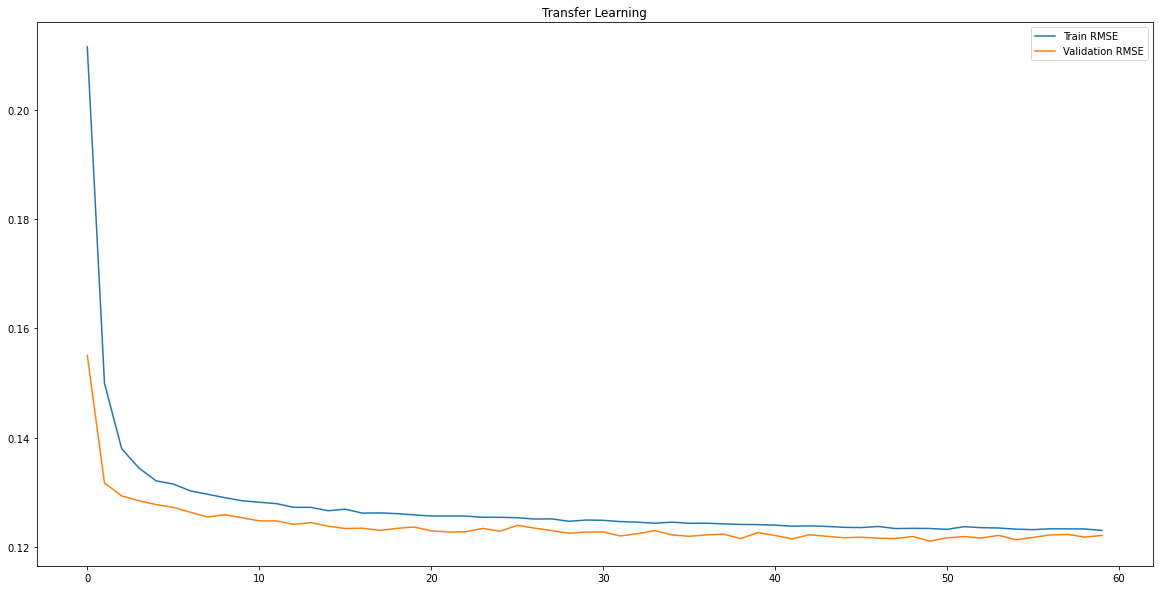

In [30]:
fig,ax = plt.subplots(1,1,figsize = (20,10))
ax.plot(history.history['root_mean_squared_error'],label = 'Train RMSE')
ax.plot(history.history['val_root_mean_squared_error'],label = 'Validation RMSE')
ax.set_title("Transfer Learning")
plt.legend()